## Use OverPy to collect POI data

In [1]:
import overpy

In [2]:
CITY = 'New Delhi'

query = f'''[out:json];
area[name="{CITY}"];
node["amenity"](area);
out; '''

In [5]:
api = overpy.Overpass()
res = api.query(query)

In [6]:
nodes = []
for node in res.nodes:
    if node.tags:
        nodes.append({
            'id': node.id,
            'lon': float(node.lon),
            'lat': float(node.lat),
            'amenity': node.tags['amenity']
        })
nodes

[{'id': 248852574, 'lon': 77.1518947, 'lat': 28.533492, 'amenity': 'cafe'},
 {'id': 248852583, 'lon': 77.152001, 'lat': 28.5336472, 'amenity': 'bank'},
 {'id': 266442982, 'lon': 77.164493, 'lat': 28.5573088, 'amenity': 'cinema'},
 {'id': 266443204, 'lon': 77.1645488, 'lat': 28.5578459, 'amenity': 'bank'},
 {'id': 266443228,
  'lon': 77.1637622,
  'lat': 28.5573346,
  'amenity': 'fast_food'},
 {'id': 271335768, 'lon': 77.1378574, 'lat': 28.489358, 'amenity': 'school'},
 {'id': 277420968, 'lon': 77.1070198, 'lat': 28.5336932, 'amenity': 'fuel'},
 {'id': 279161182, 'lon': 77.1570574, 'lat': 28.525047, 'amenity': 'bank'},
 {'id': 279161187, 'lon': 77.1561648, 'lat': 28.5262695, 'amenity': 'fuel'},
 {'id': 301037300, 'lon': 77.1850155, 'lat': 28.5499496, 'amenity': 'parking'},
 {'id': 308894803,
  'lon': 77.2299189,
  'lat': 28.6069461,
  'amenity': 'restaurant'},
 {'id': 309861440, 'lon': 77.185421, 'lat': 28.5983754, 'amenity': 'school'},
 {'id': 312102918, 'lon': 77.2089741, 'lat': 28.57

## Load Data to Pandas Dataframe

In [39]:
import pandas as pd

df = pd.DataFrame(nodes)
df

,id,lon,lat,amenity
0,248852574,77.151895,28.533492,cafe
1,248852583,77.152001,28.533647,bank
2,266442982,77.164493,28.557309,cinema
3,266443204,77.164549,28.557846,bank
4,266443228,77.163762,28.557335,fast_food
...,...,...,...,...
968,6908305667,77.184036,28.570453,drinking_water
969,6918479553,77.216821,28.590440,fountain
970,6918479554,77.216761,28.590677,fountain
971,6918479556,77.216881,28.590228,fountain


### Data Cleaning

In [40]:
df.dropna(inplace=True)
df

,id,lon,lat,amenity
0,248852574,77.151895,28.533492,cafe
1,248852583,77.152001,28.533647,bank
2,266442982,77.164493,28.557309,cinema
3,266443204,77.164549,28.557846,bank
4,266443228,77.163762,28.557335,fast_food
...,...,...,...,...
968,6908305667,77.184036,28.570453,drinking_water
969,6918479553,77.216821,28.590440,fountain
970,6918479554,77.216761,28.590677,fountain
971,6918479556,77.216881,28.590228,fountain


In [41]:
import folium

city_map = folium.Map([df.loc[0].lat, df.loc[0].lon], zoom_start=11)

for _, row in df.iterrows():
    folium.CircleMarker([row['lat'], row['lon']],
                        radius=1,
                        popup=row['amenity'],
                       ).add_to(city_map)

city_map

In [42]:
df['amenity'].unique()

array(['cafe', 'bank', 'cinema', 'fast_food', 'school', 'fuel', 'parking',
       'restaurant', 'fire_station', 'pharmacy', 'post_box', 'hospital',
       'toilets', 'atm', 'club', 'bus_station', 'embassy',
       'Netaji Nagar Market', 'Suvidha Market, Netaji Nagar',
       'place_of_worship', 'college', 'police', 'Ayurvedic Hospital',
       'House', 'public_building', 'marketplace', 'library', 'bar',
       'kindergarten', 'taxi', 'waste_basket', 'bench', 'doctors',
       'bureau_de_change', 'pub', 'fast_food;bar', 'post_office',
       'theatre', 'community_centre', 'courthouse', 'car_wash',
       'food_court', 'fountain', 'veterinary', 'training',
       'drinking_water', 'bicycle_parking', 'bicycle_rental',
       'vending_machine', 'money_transfer', 'car_rental', 'telephone',
       'waste_disposal', 'bicycle_repair_station', 'nightclub', 'dentist',
       'arts_centre', 'music_school', 'internet_cafe', 'coworking_space',
       'charging_station', 'shelter', 'conference_centr

In [43]:
commerical_amenities = [
    'cafe', 'bank', 'cinema', 'fast_food', 'school', 'parking','restaurant', 'hospital', 'club', 'bus_station', \
    'public_building', 'marketplace', 'library', 'bar', 'taxi', 'pub', 'fast_food;bar', 'post_office', 'theatre',\
    'community_centre', 'courthouse', 'food_court', 'nightclub', 'dentist', 'arts_centre', 'music_school', \
    'internet_cafe', 'coworking_space' 
]

In [44]:
df = df.loc[df['amenity'].isin(commerical_amenities)]
df

,id,lon,lat,amenity
0,248852574,77.151895,28.533492,cafe
1,248852583,77.152001,28.533647,bank
2,266442982,77.164493,28.557309,cinema
3,266443204,77.164549,28.557846,bank
4,266443228,77.163762,28.557335,fast_food
...,...,...,...,...
950,6853697488,77.163803,28.557183,bank
951,6853697490,77.163984,28.558390,bank
952,6853697495,77.164017,28.558173,bank
953,6853697496,77.164456,28.557856,cafe


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 0 to 966
Data columns (total 4 columns):
id         414 non-null int64
lon        414 non-null float64
lat        414 non-null float64
amenity    414 non-null object
dtypes: float64(2), int64(1), object(1)
memory usage: 16.2+ KB


In [46]:
city_map = folium.Map([df.loc[0].lat, df.loc[0].lon], zoom_start=11)

for _, row in df.iterrows():
    folium.CircleMarker([row['lat'], row['lon']],
                        radius=1,
                        popup=row['amenity'],
                       ).add_to(city_map)

city_map

In [47]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
coor_t = sc.fit_transform(df[['lat', 'lon']])

In [48]:
from hdbscan import HDBSCAN

model = HDBSCAN(metric='haversine', min_cluster_size=5)

model.fit(coor_t)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_method='eom',
        core_dist_n_jobs=4, gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='haversine', min_cluster_size=5, min_samples=None, p=None,
        prediction_data=False)

In [49]:
clusters = model.labels_
set(clusters)

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18}

In [50]:
clusters

array([-1, -1, 13, 13, 13, -1, -1, 11,  3,  2, 14,  2,  2, 18, -1, -1,  2,
        9,  9,  9,  9,  9,  9,  9,  9,  9, -1, -1, -1, -1, -1, 18, -1, 16,
       -1, 16, 18, 18, -1,  7,  2,  9, -1,  9,  4,  8,  8, -1,  1, 18, -1,
       15, -1, -1, 13, 13, 13, 13, 11,  9,  9, 18,  9,  9, -1, 15, 15, -1,
       15, 15, 15,  9, 18,  5, 13, 13, 13,  1,  1,  1,  1,  1,  3,  9, 17,
       -1,  9, -1, -1, -1,  9, -1, -1, -1, -1, 12, 11,  9, -1, -1,  9,  9,
        6,  9, -1,  2,  9,  9, 14, 14, 14, 14,  6,  6,  6,  6,  9,  9,  9,
        4,  9,  7,  9,  9,  7,  7, 17, 17,  6, 18, 18, 17, 17, 17, 18,  9,
        9,  9,  9,  9,  9,  9,  9, -1,  9,  3, -1, -1,  9, -1,  9,  5,  9,
        4,  9,  9,  4,  4,  4, -1,  9, -1, 12, 12, 12, 12, -1,  3,  3, -1,
        9,  9, 10,  3,  2,  9, -1,  0,  7, 15,  9, -1,  4, -1, -1,  9,  9,
        9,  9,  9,  9,  9,  9,  5,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,
        9,  9,  9,  9,  9,  9, -1, 14,  3,  9, 11,  2,  2,  2,  2,  2, -1,
       -1, -1, -1,  9, -1

/home/sourish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  import sys


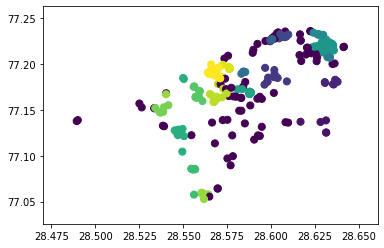

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot()
scatter = ax.scatter(df[['lat']],df[['lon']],c=clusters.reshape(-1,1),s=50)
fig.show()

In [52]:
df['cluster'] = clusters
df

/home/sourish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,lon,lat,amenity,cluster
0,248852574,77.151895,28.533492,cafe,-1
1,248852583,77.152001,28.533647,bank,-1
2,266442982,77.164493,28.557309,cinema,13
3,266443204,77.164549,28.557846,bank,13
4,266443228,77.163762,28.557335,fast_food,13
...,...,...,...,...,...
950,6853697488,77.163803,28.557183,bank,13
951,6853697490,77.163984,28.558390,bank,13
952,6853697495,77.164017,28.558173,bank,13
953,6853697496,77.164456,28.557856,cafe,13


In [53]:
df = df[df.cluster != -1]
df

,id,lon,lat,amenity,cluster
2,266442982,77.164493,28.557309,cinema,13
3,266443204,77.164549,28.557846,bank,13
4,266443228,77.163762,28.557335,fast_food,13
9,301037300,77.185016,28.549950,parking,11
10,308894803,77.229919,28.606946,restaurant,3
...,...,...,...,...,...
950,6853697488,77.163803,28.557183,bank,13
951,6853697490,77.163984,28.558390,bank,13
952,6853697495,77.164017,28.558173,bank,13
953,6853697496,77.164456,28.557856,cafe,13


/home/sourish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


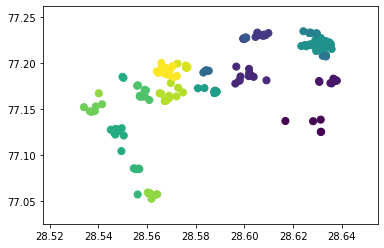

In [56]:
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(df[['lat']],df[['lon']],c=np.array(df.cluster).reshape(-1,1),s=50)
fig.show()

In [57]:
city_map = folium.Map([(min(df.lat)+max(df.lat))/2, (min(df.lon)+max(df.lon))/2], zoom_start=11)

for _, row in df.iterrows():
    folium.CircleMarker([row['lat'], row['lon']],
                        radius=1,
                        popup=row['amenity'],
                       ).add_to(city_map)

city_map